In [2]:
##Import relevant modules/libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **DATASET DESCRIPTION**

The dataset was created by UNICEF that contained their estimates for each countries' child mortality rate for the last few decades. Child mortality rate can be defined as the probability of a child between aged 1 to 5 to die in a certain country.

It can be computed by dividing the number of child deaths in a certain period by the number of children who survived for 12 months for that period.

## **SCOPE AND LIMITATIONS**

The analysis only included data from the last 20 years for two reasons:
1. the data from 1999 and earlier were removed to focus on the more recent years.
2. There were countries with a lot of null values for the years 1999 and earlier.

## **LIMITING ESTIMATES**

The data provided in the datasets were estimates; the creators found it prudent to provide three estimates for each country's child mortality rate. They provided the upper estimates, the lower estimates, and the median estimates. 

For this analysis, we will be focusing on the **median estimates**.

In [271]:
##Import the CSV file

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Child Mortality Rate/childmortalityrate.csv')

##Renaming the columns

df = df.rename( columns=
    {
        'ISO.Code' : 'Country Code',
     'Country.Name': 'Country',
     'Uncertainty.Bounds*' : 'Estimate Range'
    }
)

##The last two rows should also be deleted. 

df = df.drop(df.index[585:])

In [ ]:
##Specifiying the data to only show the Median datasets

newdf = df.loc[df['Estimate Range'] == 'Median']

##Dropping the column for estimate range because we are only dealing with the median estimates from now on.
newdf = newdf.drop(labels='Estimate Range', axis=1)

##Calling the new dataframe
newdf

In [ ]:
##The dataframe columns have the right data types and there are no more null values
newdf.info()

# **DATA VISUALIZATIONS**

In [273]:
##Finding the average child mortality rate over the years.

newdf_stats = newdf.describe()
cmr_mean = newdf_stats.iloc[1].to_frame()

# DATA VISUALIZATION FOR AVERAGE CHILD MORTALITY *RATE*

In [ ]:
##Plotting the average child mortality rate over the years.

plt.figure(figsize=(30,10))
years = cmr_mean.index

plt.plot(years, cmr_mean, marker='v')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Child Mortality Rate(Per 1000 Children aged 12 months)', fontsize=18)
plt.title('Average Child Mortality Rate over the years', fontsize=32)

sns.set_style('darkgrid')

# DATA VISUALIZATION FOR PHILIPPINES

In [ ]:
##Extracting the data from Philippines

plt.figure(figsize=(30,10))

ph_cmr = newdf.loc[newdf['Country'] == 'Philippines']

ph_cmr = ph_cmr.iloc[0,2:]

##Plotting the Child Mortality Rate for the Philippines

plt.plot(years, ph_cmr, marker='o', linewidth=2)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Child Mortality Rate(Per 1000 Children aged 12 months)', fontsize=18)
plt.title('Child Mortality Rate over the years in the Philippines', fontsize=32);


# DATA VISUALIZATION FOR WORLDWIDE AGAINST THE PHILIPPINES

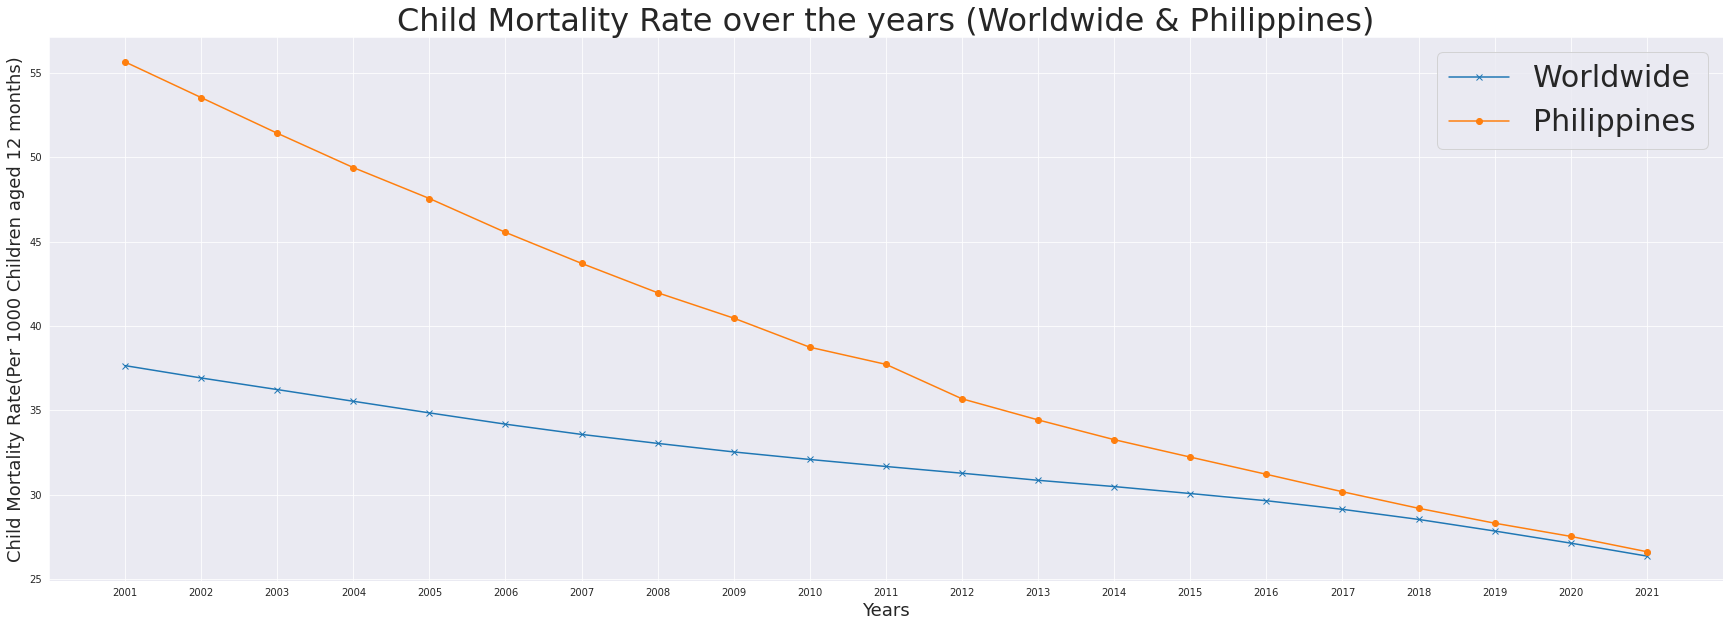

In [277]:
##Comparing the average mortality rate worldwide and in the Philippines

plt.figure(figsize=(30,10))
plt.plot(years, ph_cmr, marker='x')
plt.plot(years, cmr_mean, marker = 'o')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Child Mortality Rate(Per 1000 Children aged 12 months)', fontsize=18)
plt.title('Child Mortality Rate over the years (Worldwide & Philippines)', fontsize=32)


plt.legend(['Worldwide','Philippines'],fontsize=30);

# DATA VISUALIZATION FOR THE TOP COUNTRIES WITH THE LOWEST CHILD MORTALITY RATE

In [ ]:
##Here are the top5 countries with the lowest child mortality rate
##Note that they are mostly Western
top5 = newdf.sort_values(by='2021').head(5)

#Changing the index of the new dataframe to the respective country
top5.index = top5['Country']

##Showing only the relevant columns
top5 = top5.iloc[:,2:]

##San Marino (It's a country near Italy. Look it up)
sm_cmr = top5.iloc[0]

##Iceland
ice_cmr = top5.iloc[1]

##Estonia
est_cmr = top5.iloc[2]

##Slovenia
slo_cmr = top5.iloc[3]

##Norway
nor_cmr = top5.iloc[4]


##Plotting the trend for these two countries

plt.figure(figsize=(30,10))
plt.plot(years, sm_cmr, marker='o')
plt.plot(years, ice_cmr, marker='v')
plt.plot(years, est_cmr, marker='d')
plt.plot(years, slo_cmr,marker='s')
plt.plot(years, nor_cmr, marker='x')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Child Mortality Rate(Per 1000 Children aged 12 months)', fontsize=18)
plt.title('Top 5 countries with the lowest Child Mortality Rate', fontsize=32)
plt.legend(['San Marino','Iceland','Estonia','Slovenia','Norway'], fontsize=20)
plt.show();

# CHILD MORTALITY RATE BETWEEN SAN MARINO VS PHILIPPINES

In [ ]:
##Comparing Philippine child mortality rate and San Marino's child mortality rate

plt.figure(figsize=(30,10))
plt.plot(years, sm_cmr, marker='o')
plt.plot(years, ph_cmr, marker='v')
plt.xlabel('Years', fontsize=18)
plt.ylabel('Child Mortality Rate(Per 1000 Children aged 12 months)', fontsize=18)
plt.title('Child Mortality Rate (San Marino vs Philippines)', fontsize=32)
plt.legend(['San Marino', 'Philippines'], fontsize=20)
plt.show();

## COUNTRIES WITH HIGHEST CHILD MORTALITY RATE IN 2021

In [ ]:
##Plotting the figures for countries with the top 10 highest child mortality rate in 2021

plt.figure(figsize=(30,10))
newdf.iloc[:,-1].to_frame()

newdf = newdf.sort_values(by = '2021')
newdf = newdf.tail(10)

country = newdf['Country']
year2021_cmr = newdf['2021']
plt.xlabel('Countries', fontsize = 18)
plt.ylabel('Child Mortality Rate (Per 1000 child surviving for 12 months', fontsize = 18 )
plt.title('Top 10 Countries with the highest child mortality rate in 2021' , fontsize = 30)

plt.bar(country, year2021_cmr)
plt.show()

## COUNTRIES WITH THE HIGHEST CHILD MORTALITY RATE IN 2020

In [ ]:
##Plotting the figures for countries with the top 10 highest child mortality rate in 2020

plt.figure(figsize=(30,10))
newdf.iloc[:,-1].to_frame()

newdf = newdf.sort_values(by = '2020')
newdf = newdf.tail(10)

country = newdf['Country']
year2020_cmr = newdf['2020']
plt.xlabel('Countries', fontsize = 18)
plt.ylabel('Child Mortality Rate (Per 1000 child surviving for 12 months', fontsize = 18 )
plt.title('Top 10 Countries with the highest child mortality rate in 2020', fontsize = 30)

plt.bar(country, year2020_cmr)
plt.show()

## COUNTRIES WITH THE HIGHEST CHILD MORTALITY RATE 2020 VS 2021

In [ ]:
##Plotting the 2021 and 2020 graphs in one graph


newdf.iloc[:,-1].to_frame()

##Plotting the figures for countries with the top 10 highest child mortality rate in 2021

fig, ax = plt.subplots(1,2, figsize=(30,15))

thatdf = newdf.sort_values(by = '2020')
thatdf = thatdf.tail(10)

country = thatdf['Country']
year2020_cmr = thatdf['2020']

plt.subplot(2,1,1)
plt.bar(country, year2020_cmr)
plt.xlabel('Countries')
plt.ylabel('Child Mortality Rate (Per 1000 child surviving for 12 months')
plt.title('Top 10 Countries with the highest child mortality rate in 2020', fontsize=18)


##-----------------------------------------------------##



thisdf = newdf.sort_values(by = '2021')
thisdf = thisdf.tail(10)

country = thisdf['Country']
year2021_cmr = thisdf['2021']


plt.subplot(2,1,2)
plt.bar(country, year2021_cmr, color='gray')
plt.xlabel('Countries')
plt.ylabel('Child Mortality Rate (Per 1000 child surviving for 12 months')
plt.title('Top 10 Countries with the highest child mortality rate in 2021', fontsize=18)
plt.show()


plt.suptitle('Countries with the highest child mortality rate from 2020 to 2021')

plt.show()